<a href="https://colab.research.google.com/github/rndrpp/Investigate-Hotel-Business-using-Data-Visualization/blob/main/Investigate%20Hotel%20Business%20using%20Data%20Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


In [ ]:
# !pip install matplotlib --upgrade

# 1. Data Preprocessing

## Import data

In [ ]:
df = pd.read_csv('hotel_bookings_data.csv')

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Identifying missing values



In [ ]:
df.isna().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_weekdays_nights          False
adults                            False
children                           True
babies                            False
meal                              False
city                               True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True
days_in_waiting_list              False
customer_type                     False


In [ ]:
df.isnull().mean() * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_weekdays_nights           0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
city                               0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                             13.686238
company                         

## Identifying duplicated values



In [ ]:
df.duplicated().sum()

33261

## Identify outliers

In [ ]:
nums = df.select_dtypes(exclude='object').columns.tolist()
cats = df.select_dtypes(include='object').columns.tolist()

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
df[cats].describe().T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


## Identify incosistent data

> Indented block



In [ ]:
for cat in cats:
    print({cat}, 'total unique value:', {df[cat].nunique()})
    print({cat},'values:', df[cat].unique().tolist(),'\n')


{'hotel'} total unique value: {2}
{'hotel'} values: ['Resort Hotel', 'City Hotel'] 

{'arrival_date_month'} total unique value: {12}
{'arrival_date_month'} values: ['September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'] 

{'meal'} total unique value: {5}
{'meal'} values: ['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'] 

{'city'} total unique value: {177}
{'city'} values: ['Kota Denpasar', 'Kabupaten Bangka', 'Kabupaten Sleman', 'Kota Batu', 'Kota Malang', 'Kota Yogyakarta', nan, 'Kabupaten Tangerang', 'Kota Semarang', 'Kota Serang', 'Kota Tangerang', 'Kota Bogor', 'Kabupaten Bandung', 'Kabupaten Magelang', 'Kabupaten Sumedang', 'Kota Jakarta Timur', 'Kabupaten Purwakarta', 'Kabupaten Kepulauan Seribu', 'Kabupaten Belitung', 'Kota Jakarta Pusat', 'Kota Jakarta Selatan', 'Kota Surabaya', 'Kota Jakarta Utara', 'Kota Gorontalo', 'Kota Jambi', 'Kota Jakarta Barat', 'Kota Bengkulu', 'Kabupaten Bandung Barat', 'K

## Handling missing values

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['children'].fillna(0, inplace=True)
df_copy['city'].fillna('Undefined', inplace=True)
df_copy['deposit_type'].fillna('No Deposit', inplace=True)
df_copy['agent'].fillna(df['agent'].median(), inplace=True)
df_copy.drop('company', axis=1, inplace=True)

In [ ]:
df_copy.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_weekdays_nights          False
adults                            False
children                          False
babies                            False
meal                              False
city                              False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
booking_changes                   False
deposit_type                      False
agent                             False
days_in_waiting_list              False
customer_type                     False
adr                               False


## Handling duplicate

In [ ]:
print("Before:", len(df_copy))
df_copy.drop_duplicates(inplace=True)
print("After:", len(df_copy))

Before: 119390
After: 86118


## Normalization

In [ ]:
df_copy['meal'].replace('Undefined', 'No Meal', inplace=True)
print(df_copy.shape)

(86118, 28)


In [ ]:
df_cleaned = df_copy.copy()

In [ ]:
df_cleaned.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
40,Resort Hotel,1,45,2017,September,27,2,2,3,2,...,0,0,No Deposit,241.0,0,Personal,117.81,0,0,Canceled
27354,Resort Hotel,0,82,2018,October,34,20,2,5,2,...,0,0,No Deposit,250.0,0,Personal,234.60,1,0,Check-Out
56043,City Hotel,1,127,2018,October,35,27,2,1,2,...,0,0,No Deposit,28.0,0,Personal,94.78,0,2,Canceled
115124,City Hotel,0,188,2019,August,26,29,0,3,2,...,0,0,No Deposit,9.0,0,Personal,131.70,0,1,Check-Out
83218,City Hotel,0,6,2018,March,5,24,1,0,2,...,0,0,No Deposit,14.0,0,Personal,87.00,0,0,Check-Out


# Monthly

In [ ]:
df_cleaned.groupby(['arrival_date_month', 'arrival_date_year', 'hotel'])['hotel'].count().reset_index(name='total_reservation')

,arrival_date_month,arrival_date_year,hotel,total_reservation
0,April,2018,City Hotel,1631
1,April,2018,Resort Hotel,1135
2,April,2019,City Hotel,1929
3,April,2019,Resort Hotel,1339
4,August,2018,City Hotel,2224
5,August,2018,Resort Hotel,1218
6,August,2019,City Hotel,2703
7,August,2019,Resort Hotel,1512
8,December,2017,City Hotel,1457
9,December,2017,Resort Hotel,1111


In [ ]:
df_cleaned['year'] = df_cleaned['arrival_date_year'] 
df_cleaned['month'] = pd.to_datetime(df_cleaned['arrival_date_month'] , format='%B').dt.month.astype(int)
df_cleaned['day'] = df_cleaned['arrival_date_day_of_month'] 

In [ ]:
df_cleaned.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,year,month,day
26540,Resort Hotel,0,23,2018,September,31,28,2,4,2,...,240.0,0,Personal,203.0,1,0,Check-Out,2018,9,28
30412,Resort Hotel,0,183,2018,January,47,18,1,2,2,...,411.0,116,Family,52.0,0,0,Check-Out,2018,1,18
67702,City Hotel,1,64,2019,July,18,6,2,1,3,...,9.0,0,Personal,189.0,0,0,Canceled,2019,7,6
26250,Resort Hotel,0,48,2018,September,31,24,2,0,2,...,240.0,0,Personal,253.0,1,1,Check-Out,2018,9,24
59314,City Hotel,1,159,2018,December,44,26,1,4,3,...,9.0,0,Personal,123.3,0,1,Canceled,2018,12,26


In [ ]:
df_cleaned['arrival_date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']], format='%Y-%m-%d', errors='coerce')

In [ ]:
df_cleaned.loc[df_cleaned['arrival_date'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,year,month,day,arrival_date
814,Resort Hotel,0,42,2017,September,31,31,0,0,1,...,0,Contract,0.0,0,0,Check-Out,2017,9,31,NaT
815,Resort Hotel,0,46,2017,September,31,31,0,0,2,...,0,Personal,0.0,1,0,Check-Out,2017,9,31,NaT
816,Resort Hotel,0,0,2017,September,31,31,0,1,2,...,0,Personal,188.0,0,0,Check-Out,2017,9,31,NaT
817,Resort Hotel,1,25,2017,September,31,31,0,1,2,...,0,Personal,153.0,0,2,Canceled,2017,9,31,NaT
818,Resort Hotel,1,16,2017,September,31,31,0,1,2,...,0,Personal,173.0,0,3,Canceled,2017,9,31,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117642,City Hotel,0,174,2019,September,31,31,2,5,2,...,0,Personal,80.1,0,0,Check-Out,2019,9,31,NaT
117715,City Hotel,0,125,2019,September,31,31,3,6,2,...,0,Personal,193.0,0,0,Check-Out,2019,9,31,NaT
117737,City Hotel,0,158,2019,September,31,31,3,6,2,...,0,Family,112.5,0,1,Check-Out,2019,9,31,NaT
117772,City Hotel,0,158,2019,September,31,31,3,6,3,...,0,Family,132.5,0,1,Check-Out,2019,9,31,NaT


In [ ]:
df_cleaned.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_weekdays_nights             0
adults                               0
children                             0
babies                               0
meal                                 0
city                                 0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
deposit_type                         0
agent                                0
days_in_waiting_list                 0
customer_type                        0
adr                                  0
required_car_parking_spac

In [ ]:
for idx, row in df_cleaned.iterrows():
  if df_cleaned.loc[idx,'month'] == 9 and df_cleaned.loc[idx,'day'] == 31:
    df_cleaned.loc[idx, 'arrival_date_month'] = 'October'
    df_cleaned.loc[idx, 'arrival_date_day_of_month'] = 1
    df_cleaned.loc[idx,'month'] = 10
    df_cleaned.loc[idx,'day'] = 1
  elif df_cleaned.loc[idx,'month'] == 2 and df_cleaned.loc[idx,'day'] == 30:
    df_cleaned.loc[idx, 'arrival_date_month'] = 'March'
    df_cleaned.loc[idx, 'arrival_date_day_of_month'] = 1
    df_cleaned.loc[idx,'month'] = 3
    df_cleaned.loc[idx,'day'] = 1
  elif df_cleaned.loc[idx,'month'] == 2 and df_cleaned.loc[idx,'day'] == 31:
    df_cleaned.loc[idx, 'arrival_date_month'] = 'March'
    df_cleaned.loc[idx, 'arrival_date_day_of_month'] = 2
    df_cleaned.loc[idx,'month'] = 3
    df_cleaned.loc[idx,'day'] = 2
  elif df_cleaned.loc[idx,'month'] == 2 and df_cleaned.loc[idx,'day'] == 29 and df_cleaned.loc[idx,'year'] == 2017:
    df_cleaned.loc[idx, 'arrival_date_month'] = 'March'
    df_cleaned.loc[idx, 'arrival_date_day_of_month'] = 1
    df_cleaned.loc[idx,'month'] = 3
    df_cleaned.loc[idx,'day'] = 1
  elif df_cleaned.loc[idx,'month'] == 2 and df_cleaned.loc[idx,'day'] == 29 and df_cleaned.loc[idx,'year'] == 2018:
    df_cleaned.loc[idx, 'arrival_date_month'] = 'March'
    df_cleaned.loc[idx, 'arrival_date_day_of_month'] = 1
    df_cleaned.loc[idx,'month'] = 3
    df_cleaned.loc[idx,'day'] = 1

In [ ]:
df_cleaned['arrival_date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']], format='%Y-%m-%d', errors='coerce')

In [ ]:
df_cleaned.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
df_cleaned.loc[df_cleaned['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,year,month,day,arrival_date
2224,Resort Hotel,0,1,2017,December,41,6,0,3,0,...,0,Family,0.00,0,0,Check-Out,2017,12,6,2017-12-06
2409,Resort Hotel,0,0,2017,December,42,12,0,0,0,...,0,Personal,0.00,0,0,Check-Out,2017,12,12,2017-12-12
3181,Resort Hotel,0,36,2017,January,47,20,1,2,0,...,0,Family,0.00,0,0,Check-Out,2017,1,20,2017-01-20
3684,Resort Hotel,0,165,2017,March,53,1,1,4,0,...,122,Family,0.00,0,0,Check-Out,2017,3,1,2017-03-01
3708,Resort Hotel,0,165,2017,March,53,1,2,4,0,...,122,Family,0.00,0,0,Check-Out,2017,3,1,2017-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2019,September,30,27,1,3,0,...,0,Personal,98.85,0,1,Check-Out,2019,9,27,2019-09-27
117274,City Hotel,0,276,2019,September,31,30,2,1,0,...,0,Personal,93.64,0,2,Check-Out,2019,9,30,2019-09-30
117303,City Hotel,0,291,2019,September,30,29,2,2,0,...,0,Personal,98.85,0,1,Check-Out,2019,9,29,2019-09-29
117453,City Hotel,0,159,2019,October,31,1,1,3,0,...,0,Personal,121.88,0,1,Check-Out,2019,10,1,2019-10-01


In [ ]:
# df_cleaned.groupby(['adults', 'children', 'babies'])['adults'].count().reset_index(name='total_reservation')

In [ ]:
df_reservations = df_cleaned.groupby(['arrival_date_month', 'hotel'])['hotel'].count().reset_index(name='total_reservation')

In [ ]:
df_cleaned.groupby(['arrival_date_year', 'arrival_date_month', 'hotel'])['hotel'].count().reset_index(name='total_reservation')

,arrival_date_year,arrival_date_month,hotel,total_reservation
0,2017,December,City Hotel,1457
1,2017,December,Resort Hotel,1111
2,2017,February,City Hotel,790
3,2017,February,Resort Hotel,825
4,2017,January,City Hotel,763
5,2017,January,Resort Hotel,845
6,2017,March,City Hotel,213
7,2017,March,Resort Hotel,124
8,2017,November,City Hotel,1544
9,2017,November,Resort Hotel,1135


In [ ]:
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 
              'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

df_reservations = df_reservations.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))

df_reservations

,arrival_date_month,hotel,total_reservation
8,January,City Hotel,2895
9,January,Resort Hotel,2025
6,February,City Hotel,2541
7,February,Resort Hotel,1812
15,March,Resort Hotel,2219
14,March,City Hotel,3140
0,April,City Hotel,3560
1,April,Resort Hotel,2474
17,May,Resort Hotel,2614
16,May,City Hotel,4821


In [ ]:
df_reservations.loc[8, 'total_reservation']

2895

In [ ]:
for idx, row in df_reservations.iterrows():
  if df_reservations.loc[idx,'arrival_date_month'] == 'March' or df_reservations.loc[idx,'arrival_date_month'] == 'September' or df_reservations.loc[idx,'arrival_date_month'] == 'October':
    df_reservations.loc[idx,'total_reservation'] = df_reservations.loc[idx,'total_reservation'] / 3
  else:
    df_reservations.loc[idx,'total_reservation'] = df_reservations.loc[idx,'total_reservation'] / 2



In [ ]:
df_reservations

,arrival_date_month,hotel,total_reservation
8,January,City Hotel,1447.500000
9,January,Resort Hotel,1012.500000
6,February,City Hotel,1270.500000
7,February,Resort Hotel,906.000000
15,March,Resort Hotel,739.666667
14,March,City Hotel,1046.666667
0,April,City Hotel,1780.000000
1,April,Resort Hotel,1237.000000
17,May,Resort Hotel,1307.000000
16,May,City Hotel,2410.500000


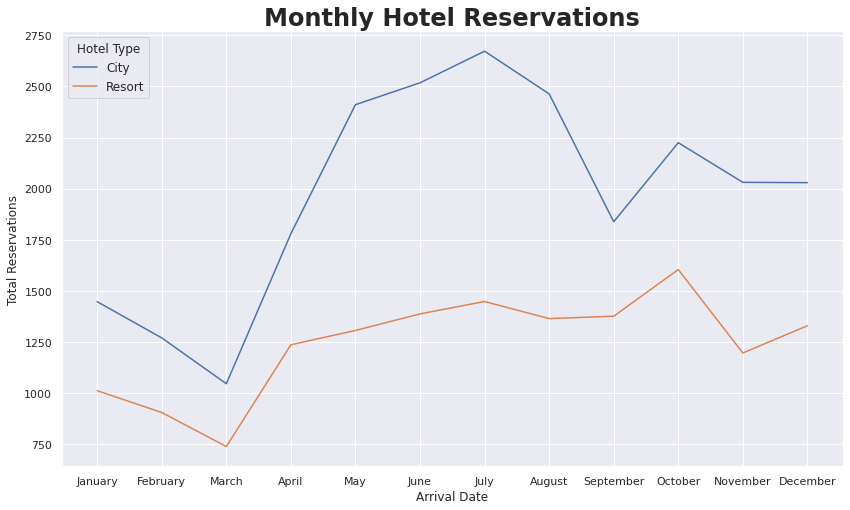

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
sns.lineplot(x="arrival_date_month", y="total_reservation",
             hue="hotel",
             data=df_reservations)
ax.set_title('Monthly Hotel Reservations', fontweight='bold', fontsize=24)
plt.xlabel('Arrival Date')
plt.ylabel('Total Reservations')
plt.legend(title='Hotel Type', loc='upper left', labels=['City', 'Resort'], prop={'size': 12});

# Duration

In [ ]:
df_cleaned['total_duration'] = df_cleaned['stays_in_weekdays_nights'] + df_cleaned['stays_in_weekend_nights']

In [ ]:
df_cleaned['total_duration'].describe(percentiles = [.25, .5, .75, .9])

count    86118.000000
mean         3.643315
std          2.770255
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
90%          7.000000
max         69.000000
Name: total_duration, dtype: float64

In [ ]:
def group_duration(total_duration):
  if total_duration < 5:
        return 'Short'
  elif total_duration <= 7:
      return 'Medium'
  else:
      return 'Long'

df_cleaned['duration_group'] = df_cleaned['total_duration'].apply(lambda x : group_duration(x))


In [ ]:
df_duration = df_cleaned.groupby(['duration_group', 'hotel', 'is_canceled' ])['hotel'].count()
df_duration

duration_group  hotel         is_canceled
Long            City Hotel    0                545
                              1                636
                Resort Hotel  0               2655
                              1               1012
Medium          City Hotel    0               5076
                              1               2562
                Resort Hotel  0               6918
                              1               2883
Short           City Hotel    0              31098
                              1              12656
                Resort Hotel  0              16091
                              1               3986
Name: hotel, dtype: int64

In [ ]:
df_duration = df_duration.unstack().apply(lambda x : x/x.sum() * 100, axis=1)
df_duration

is_canceled                          0          1
duration_group hotel                             
Long           City Hotel    46.147333  53.852667
               Resort Hotel  72.402509  27.597491
Medium         City Hotel    66.457188  33.542812
               Resort Hotel  70.584634  29.415366
Short          City Hotel    71.074645  28.925355
               Resort Hotel  80.146436  19.853564

In [ ]:
df_duration.columns = ['Approved', 'Canceled']

In [ ]:
df_duration

Approved   Canceled
duration_group hotel                             
Long           City Hotel    46.147333  53.852667
               Resort Hotel  72.402509  27.597491
Medium         City Hotel    66.457188  33.542812
               Resort Hotel  70.584634  29.415366
Short          City Hotel    71.074645  28.925355
               Resort Hotel  80.146436  19.853564

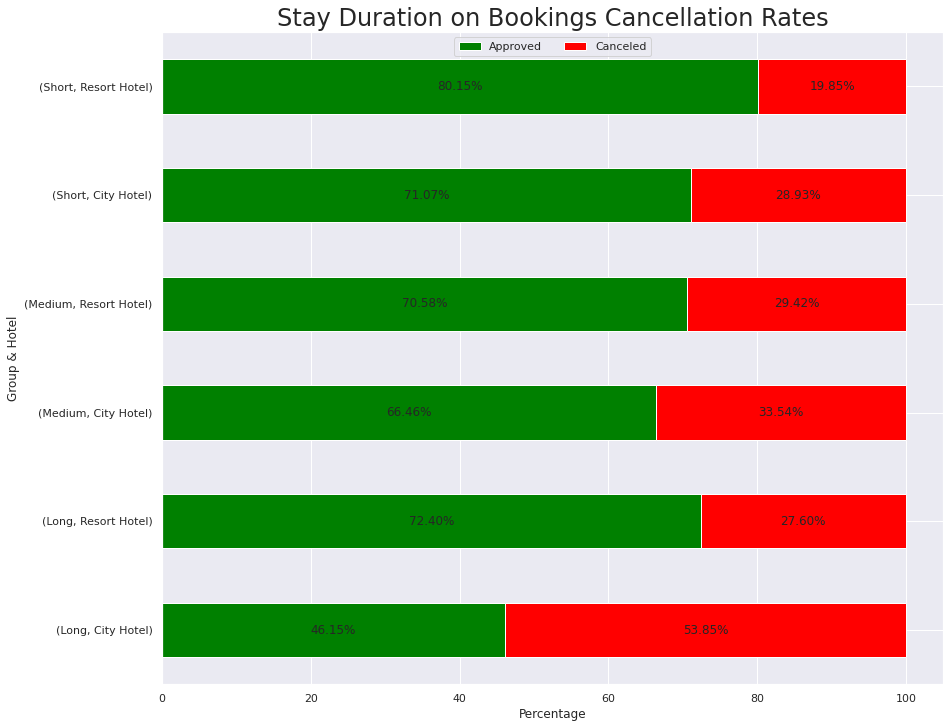

In [ ]:
ax = df_duration.plot(kind='barh', figsize = [14, 12], stacked=True, color=['green', 'red'])

for c in ax.containers:
  ax.bar_label(c, fmt='%.2f%%', label_type = 'center')

plt.xlabel('Percentage')
plt.ylabel('Group & Hotel')
plt.legend(loc='upper center', ncol = 2)

plt.title('Stay Duration on Bookings Cancellation Rates', fontsize=24);

# Lead Time

In [ ]:
df_cleaned['lead_time'].describe(percentiles = [.25, .5, .75, .9])

count    86118.000000
mean        79.255626
std         85.500145
min          0.000000
25%         11.000000
50%         49.000000
75%        124.000000
90%        203.000000
max        737.000000
Name: lead_time, dtype: float64

In [ ]:
def group_lead(lead_time):
  if lead_time < 11:
        return 'Short'
  elif lead_time <= 49:
      return 'Medium'
  else:
      return 'Long'

df_cleaned['lead_group'] = df_cleaned['lead_time'].apply(lambda x : group_lead(x))


In [ ]:
df_lead = df_cleaned.groupby(['lead_group', 'hotel', 'is_canceled' ])['hotel'].count()
df_lead = df_lead.unstack().apply(lambda x : x/x.sum() * 100, axis=1)
df_lead.columns = ['Approved', 'Canceled']
df_lead

Approved   Canceled
lead_group hotel                             
Long       City Hotel    62.124773  37.875227
           Resort Hotel  67.383974  32.616026
Medium     City Hotel    69.880260  30.119740
           Resort Hotel  75.380325  24.619675
Short      City Hotel    87.394159  12.605841
           Resort Hotel  93.376846   6.623154

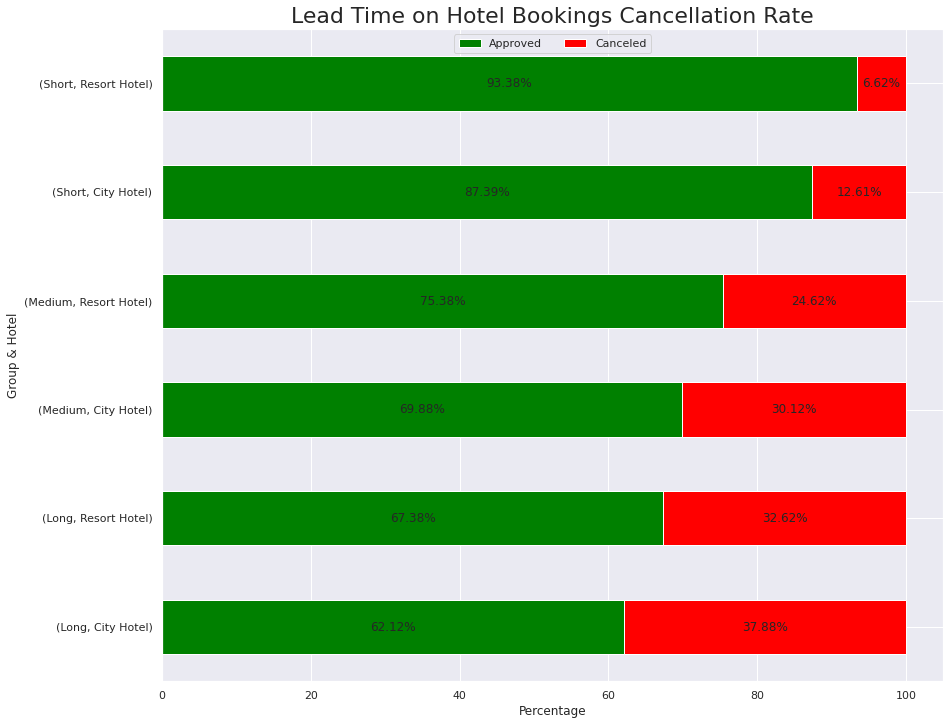

In [ ]:
ax = df_lead.plot(kind='barh', figsize = [14, 12], stacked=True, color=['green', 'red'])

for c in ax.containers:
  ax.bar_label(c, fmt='%.2f%%', label_type = 'center')

plt.xlabel('Percentage')
plt.ylabel('Group & Hotel')
plt.legend(loc='upper center', ncol = 2)

plt.title('Lead Time on Hotel Bookings Cancellation Rate', fontsize=22);